パラメータをチューニングしてモデルの汎化性能を向上させる

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [112]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state=0)

print(X_train.shape, X_test.shape)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_param = {"C": C, "gamma": gamma}

print("Best score:", best_score)
print("Best parameter:", best_param)

(112, 4) (38, 4)
Best score: 0.9736842105263158
Best parameter: {'C': 100, 'gamma': 0.001}


In [113]:
import mglearn

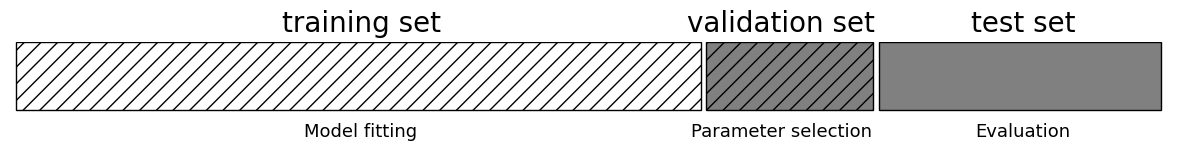

In [114]:
mglearn.plots.plot_threefold_split()

In [115]:
from sklearn.svm import SVC

# データを訓練+検証セットとテストセットに分割する
X_trainval, X_test, y_trainval, y_test = train_test_split(iris["data"], iris["target"], random_state=0)

# 訓練+検証セットを訓練セットと、検証セットに分割する
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1, test_size=0.3)
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをテストセットで評価
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_param = {"C": C, "gamma": gamma}
            
svm = SVC(gamma=best_param["gamma"], C=best_param["C"])
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Best score on validation set:", best_score)
print("Best parametesr:", best_param)
print("Test set score with best parameters:", test_score)

Best score on validation set: 0.9705882352941176
Best parametesr: {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.9736842105263158


In [116]:
import numpy as np
from sklearn.model_selection import cross_val_score

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練する
        svm = SVC(gamma=gamma, C=C)

        # 交差検証を行う
        # 交差検証ではtrainとかvalとか関係なくcross_val_scoreの内部で勝手にやってくれるためtestデータセットをすべて渡す
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)

        # 交差検証精度の平均値を計算する
        score = np.mean(scores)

        # いいスコアがでたら、スコアとパラメータを記録
        if score > best_score:
            best_score = score
            best_param = {"C": C, "gamma": gamma}

svm = SVC(**best_param)
svm.fit(X_trainval, y_trainval)

svm.score(X_test, y_test)

0.9736842105263158

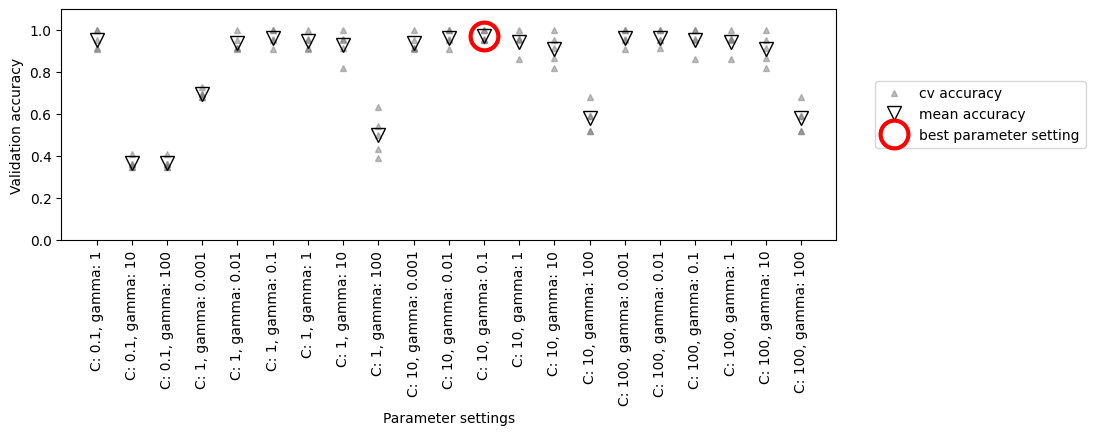

In [117]:
mglearn.plots.plot_cross_val_selection()

In [118]:
np.logspace(-5, 4, num=10)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

In [149]:
param_grid = {"C": np.logspace(-2, 9, num=12),
              "gamma": np.logspace(-8, 3, num=12)}

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state=0)

grid_search.fit(X_train, y_train)

grid_search.score(X_test, y_test)

0.9736842105263158

In [151]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10.0, 'gamma': 0.1}
0.9731225296442687


In [152]:
print(grid_search.best_estimator_.get_params())

{'C': 10.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [153]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
results.head(15)
results = pd.DataFrame(results["mean_test_score"].to_numpy().reshape(12, 12), index=param_grid["C"], columns=param_grid["gamma"])
results

,1.000000e-08,1.000000e-07,1.000000e-06,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
1.000000e-02,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403
1.000000e-01,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.696443,0.901581,0.955336,0.366403,0.366403,0.366403
1.000000e+00,0.366403,0.366403,0.366403,0.366403,0.366403,0.696443,0.937945,0.964032,0.946640,0.928458,0.501581,0.366403
1.000000e+01,0.366403,0.366403,0.366403,0.366403,0.696443,0.937945,0.964032,0.973123,0.946245,0.911067,0.581423,0.366403
1.000000e+02,0.366403,0.366403,0.366403,0.696443,0.937945,0.964032,0.964427,0.954941,0.946245,0.911067,0.581423,0.366403
1.000000e+03,0.366403,0.366403,0.696443,0.937945,0.964032,0.964427,0.964032,0.954941,0.946245,0.911067,0.581423,0.366403
1.000000e+04,0.366403,0.696443,0.937945,0.964032,0.964427,0.964032,0.964032,0.954941,0.946245,0.911067,0.581423,0.366403
1.000000e+05,0.696443,0.937945,0.964032,0.964427,0.964032,0.964032,0.964032,0.954941,0.946245,0.911067,0.581423,0.366403
1.000000e+06,0.929249,0.964032,0.973123,0.964032,0.964032,0.964032,0.964032,0.954941,0.946245,0.911067,0.581423,0.366403
1.000000e+07,0.964032,0.963636,0.937945,0.946640,0.964032,0.964032,0.964032,0.954941,0.946245,0.911067,0.581423,0.366403


In [154]:
scores

array([1.        , 0.94736842, 1.        , 0.94736842, 0.94736842,
       0.94736842, 1.        , 1.        ])

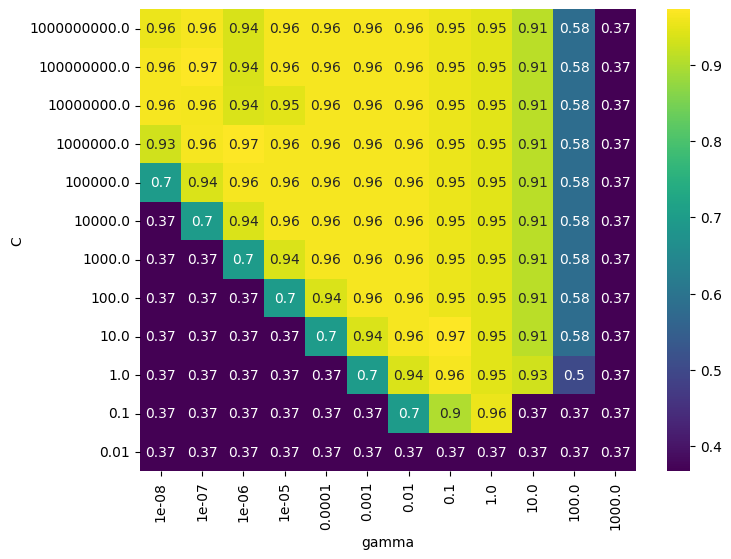

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
results = pd.DataFrame(grid_search.cv_results_)
results = pd.DataFrame(results["mean_test_score"].to_numpy().reshape(12, 12), index=param_grid["C"], columns=param_grid["gamma"])


plt.figure(figsize=(8, 6))
sns.heatmap(results.iloc[::-1, :], annot=True, cmap="viridis")
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state=0)

param_grid = [{"kernel": ["rbf"],
               "C": np.logspace(-3, 2, num=6),
               "gamma": np.logspace(-3, 2, num=6)},
              {"kernel": ["linear"],
               "C": np.logspace(-3, 2, num=6)}]


grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-val-score: ", grid_search.best_score_)

Best parameters:  {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-val-score:  0.9731225296442687


In [133]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[cv_results["param_kernel"] == "linear"]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.000399,0.000489,0.000199,0.000398,0.001,NaN,linear,"{'C': 0.001, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
37,0.000401,0.000492,0.000000,0.000000,0.010,NaN,linear,"{'C': 0.01, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,21
38,0.000200,0.000401,0.000400,0.000490,0.100,NaN,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.913043,1.000000,0.909091,0.954545,0.955336,0.039794,8
39,0.000200,0.000400,0.000199,0.000397,1.000,NaN,linear,"{'C': 1.0, 'kernel': 'linear'}",1.000000,0.956522,1.000000,0.954545,0.954545,0.973123,0.021957,1
40,0.000402,0.000492,0.000200,0.000400,10.000,NaN,linear,"{'C': 10.0, 'kernel': 'linear'}",1.000000,1.000000,1.000000,0.909091,0.954545,0.972727,0.036364,3
41,0.000398,0.000488,0.000201,0.000403,100.000,NaN,linear,"{'C': 100.0, 'kernel': 'linear'}",0.956522,0.956522,1.000000,0.909091,0.954545,0.955336,0.028764,8


In [228]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.svm import SVC

param_grid = {"C": [1],
              "gamma": [0.1]}

# 
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=10),
                         iris["data"], iris["target"], cv=10)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())



Cross-validation scores:  [1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean cross-validation score:  0.9733333333333334
